Looking at data from runs on Feb 24-25

Figures for paper, two runs, one thats identical to serial, one that is parallelized


est cv of 4000 in bound 3000-7000

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns


OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

Extra Helper Functions

In [2]:
def plot_ts(nodes, all_ts):


    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])

    plt.show()

Choosing which jobs to analyze

In [3]:
# CHANGE THIS CELL ACCORDING TO DATA YOU ARE ANALYZING
"""
identical to serial
979250

parallellized
979249

"""
NTASKS =[80,1]
JOB= ['979250', '979249']
NUM_JOBS = len(JOB)

Loading all the data we need for analysis

In [4]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    if len(var) ==1:
        load_files[job] = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 2


{'979249': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-24/979249/load_genvars_delays1.py',
 '979250': '/scratch/l/lfefebvr/noorir/model/Output/2019-02-25/979250/load_genvars_delays1b.py'}

In [6]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) in NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res)
    else:
        print("Error", job)
        break

0  Job: 979250, lowest MSE:  0.0
1  Job: 979249, lowest MSE:  0.0


Plot of MEG time series of Target Data and Correlation Matrix

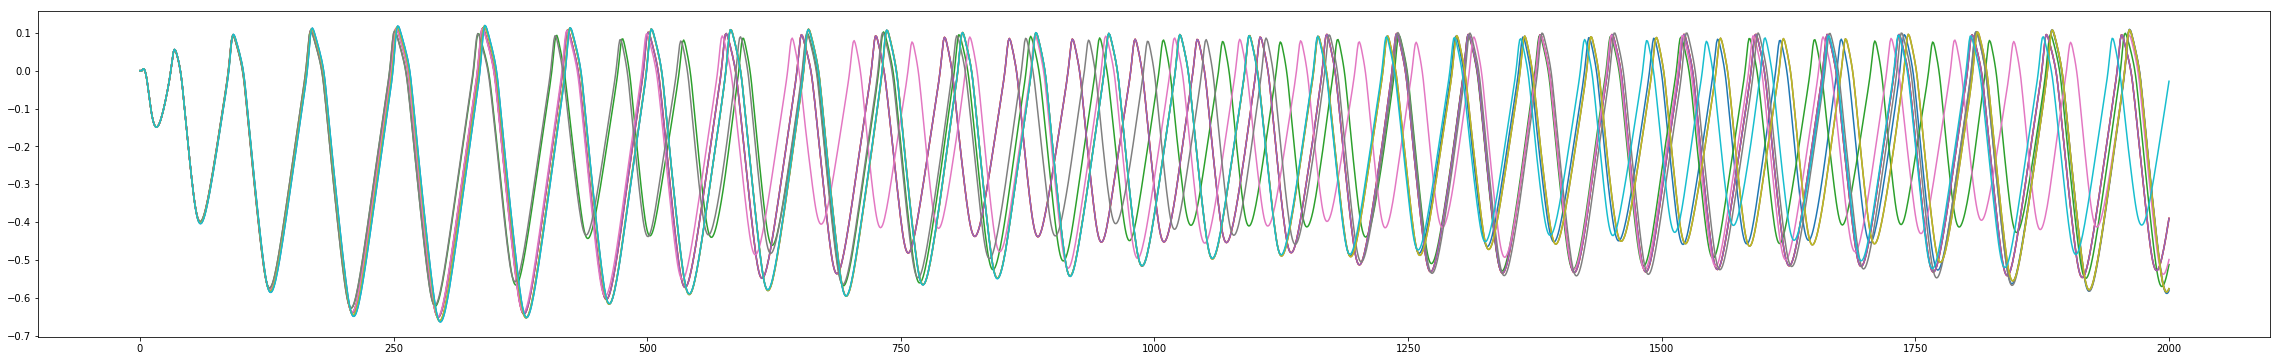

In [8]:
import matplotlib.pyplot as plt

exec(open(load_files[JOB[0]]).read())
plot_ts(nodes, ue_array)

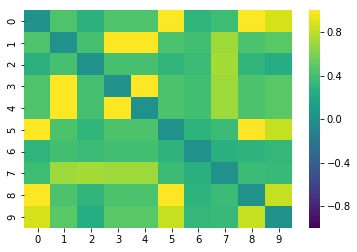

In [9]:
sns.heatmap(targ_data, vmax = 1, vmin = -1, cmap = "viridis")

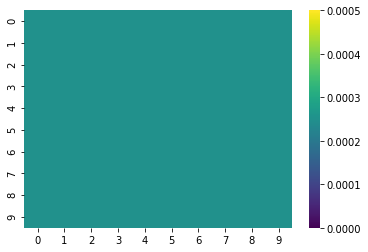

In [10]:
sns.heatmap(c_mat, vmax = 0.0005, vmin = 0, cmap = "viridis")

# STARTING ANALYSIS

Plotting all histograms of all the conduction vel / weights estimates

1 JOB #:  979250 min: 3014.789285735287 max: 6969.489796165395 avg: 4962.586217008755
2 JOB #:  979249 min: 3008.5000002305246 max: 6607.294726640762 avg: 5042.308293715252


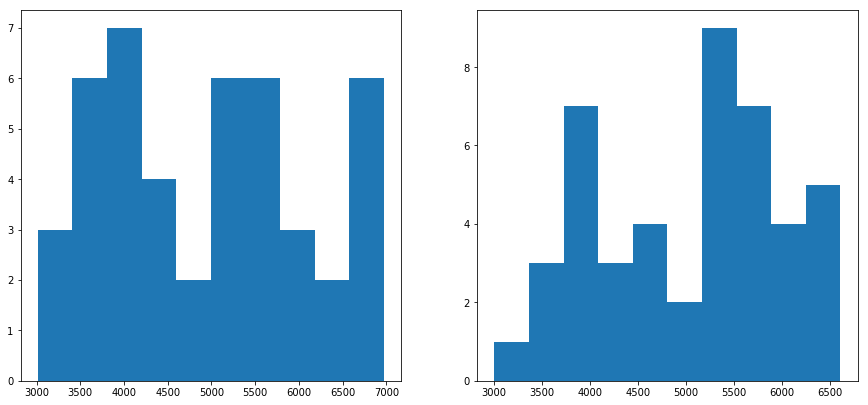

In [11]:
plt.figure(figsize=(15.0,15.0))
for i in range(NUM_JOBS): 
    plt.subplot(2, 2, i+1)


    print(i+1, "JOB #: ", JOB[i], "min: {} max: {} avg: {}".format(np.min(all_res[JOB[i]]), 
                                                                   np.max(all_res[JOB[i]]), np.average(all_res[JOB[i]])))
    plt.hist(all_res[JOB[i]])
    #row major counting


In [12]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure

top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

Looking at solution matrices

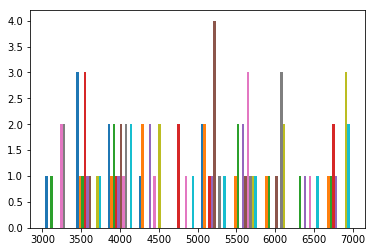

JOB #: 979250, max: 6969.489796165394 min: 3014.7892857352867


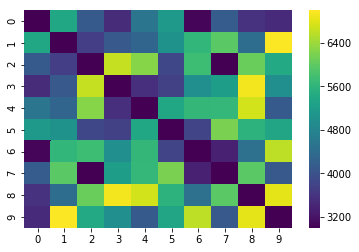

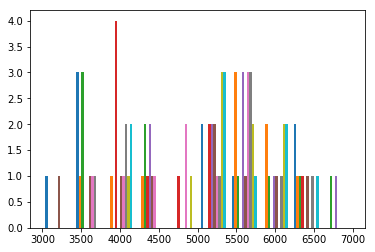

JOB #: 979249, max: 6607.294726640762 min: 3008.5000002305246


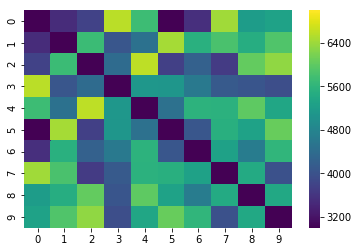

In [26]:
# ALL THE RESULTS AT ONCE

for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    ind = 0
    mat = np.ones((nodes, nodes))
    c = np.reciprocal(all_res[JOB[i]])
    for row in range(0,nodes):
        
        for col in range(row+1, nodes):
            mat[row,col] =c[ind]
            mat[col,row] = c[ind]
            ind += 1
    np.fill_diagonal(mat,0)
    #mat[0:5,5:10] =0
    #mat[5:10,0:5] =0
    plt.figure()
    plt.hist(mat, range=(3000,7000))
    plt.show()
    print("JOB #: {}, max: {} min: {}".format(JOB[i],np.max(c), np.min(c)))
    plt.figure()
    sns.heatmap(mat, cmap = "viridis", vmax =7000, vmin = 3000)

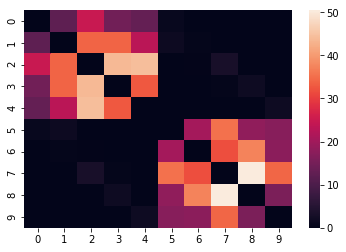

In [14]:
sns.heatmap(tract_mat)

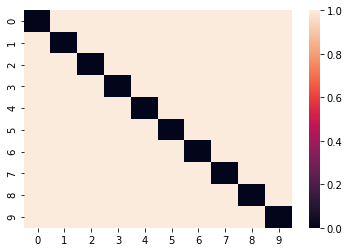

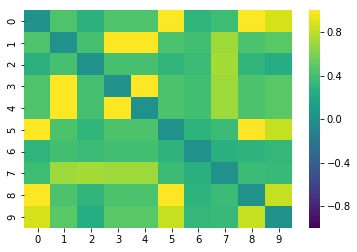

In [25]:
sns.heatmap(targ_data, cmap="viridis", vmin = -1)

In [23]:
c_mat


array([[ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.00025,
         0.00025,  0.00025,  0.00025,  0.00025],
       [ 0.00025,  0.00025,  0.00025,  0.00025,  0.00025,  0.000

In [26]:
tract_p = np.array(hf.matrix2p(tract_mat))

In [29]:
all_res[JOB[i]].shape

(45,)

In [30]:
tract_p.shape

(45,)

In [31]:
where = tract_p==0
c = all_res[JOB[i]][where]

In [32]:
c.shape

(17,)

In [34]:
where

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

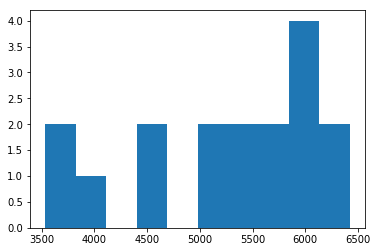

In [35]:
plt.hist(c)
plt.show()

In [39]:
np.mean(c)

5242.7894257096877

In [40]:
np.mean(all_res[JOB[i]])

5042.3082937152521